In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('csv/airfoil_self_noise.dat', sep='\t', header=None)
#header lo que hace es que npo toma los primeros valores como titulo
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [11]:
columns = ['freq', 'angle', 'chord', 'velocity', 'suction', 'sound']
df.columns = columns
df.head()

,freq,angle,chord,velocity,suction,sound
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [17]:
_X = df.iloc[:,:5]
_Y = df.iloc[:,5]
_X.shape, _Y.shape

((1503, 5), (1503,))

In [20]:
_AXIS_X = list(range(_X.shape[0]))
_AXIS_Y = _Y

In [30]:
len(_AXIS_X)
_AXIS_Y.shape

(1503,)

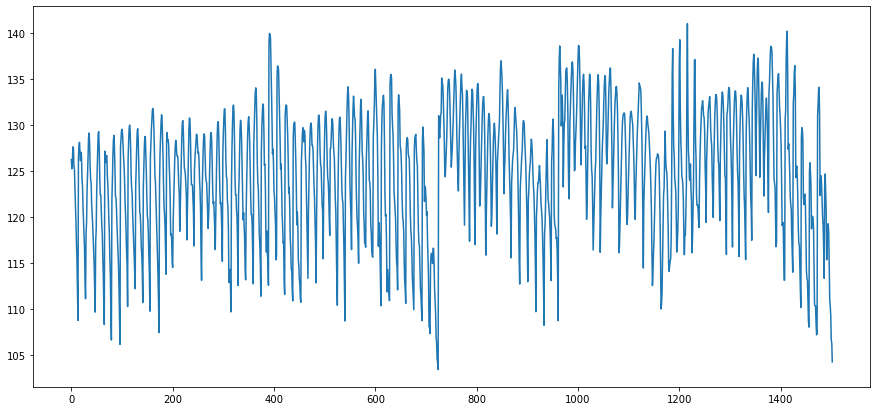

In [41]:
# graficamos en x puntos de shape en rang, y en _Y los resultados de nuestros datos

fig, ax = plt.subplots()
ax.plot(_AXIS_X, _AXIS_Y,'-')
fig.set_size_inches(15, 7)
plt.show()

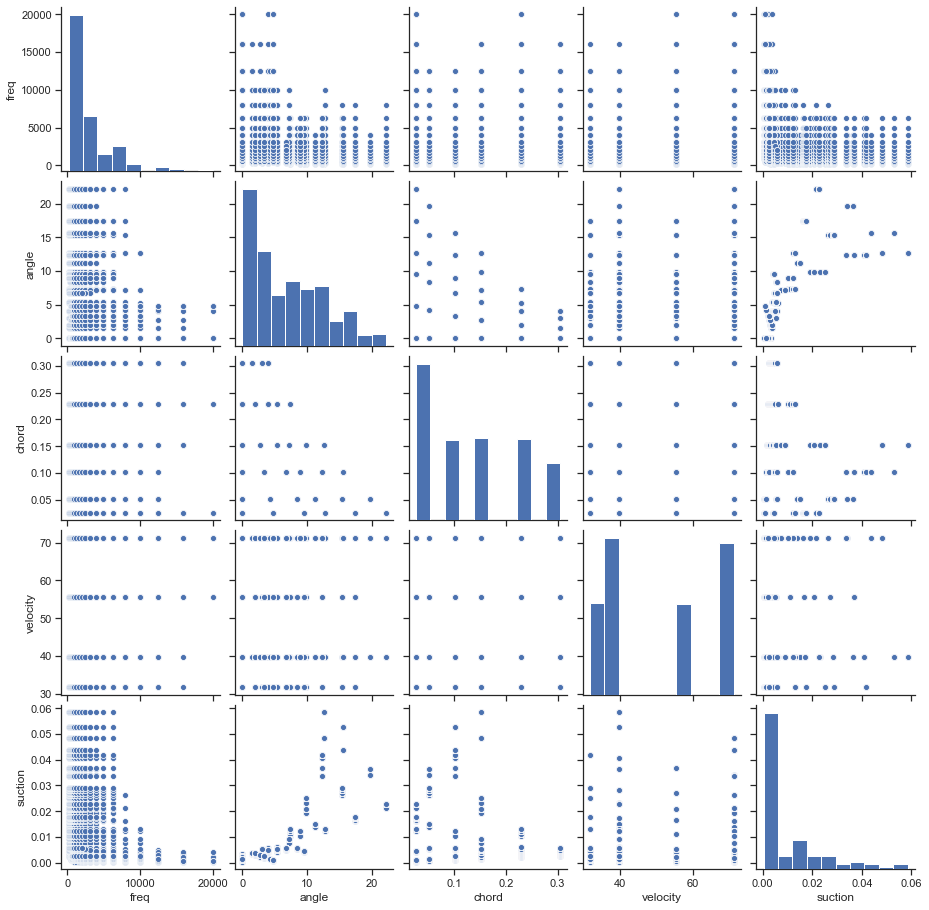

In [42]:
sns.set(style='ticks')
sns.pairplot(_X)

In [54]:
sns.violinplot(x='chord', y='angle')

ValueError: Could not interpret input 'chord'

In [55]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(_X, _Y, test_size=0.3, random_state=1)

,Data,Pred
91,117.741,119.675388
75,118.122,119.811508
1213,120.657,125.996754
330,122.229,126.013493
1352,129.343,130.689789


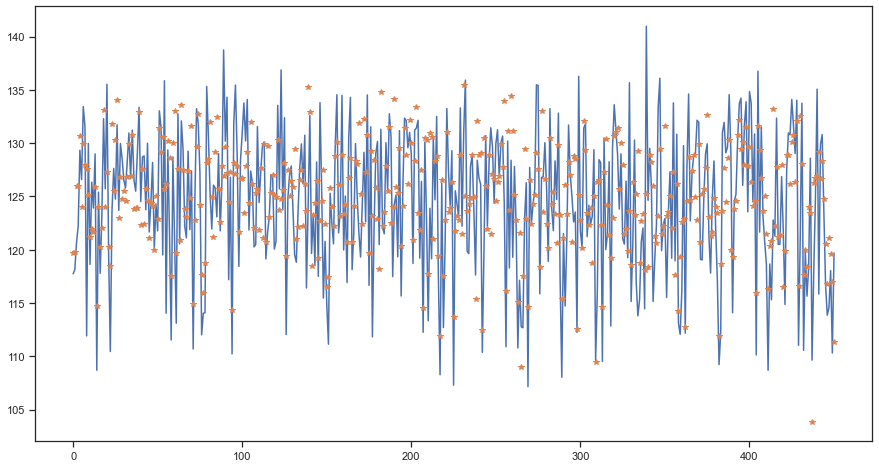

In [121]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(x_train,y_train)#with normalize=False
linpred = linreg.predict(x_test)

fig_lr, ax_lr = plt.subplots()
ax_lr.plot(range(x_test.shape[0]),y_test,'-', range(x_test.shape[0]), linpred, '*')
fig_lr.set_size_inches(15,8)
plt.xticks()

_comp = pd.DataFrame({'Data':y_test,'Pred':linpred})
_comp.head()

In [138]:
#ERROR CUADRATICO MEDIO 
from sklearn.metrics import mean_squared_error

_MSE = mean_squared_error(y_test, linpred)
_MSE
lin_norma = np.linspace(0,10,50)
data_norma = list()

for i in lin_norma:
    
    linreg = LinearRegression(normalize=i).fit(x_train,y_train)
    linpred = linreg.predict(x_test)
    data_norma.append(mean_squared_error(y_test, linpred))

df_norma = pd.DataFrame({'MSE_linpred':data_norma, 'normalize':lin_norma})
df_norma.head()
min_error = df_norma[df_norma['MSE_linpred'] == df_norma['MSE_linpred'].min()]
# min son todos ya que nbos da el mismo valor
# END LINEAL REGRESSION

In [161]:
#RIOGE

p_ridge = np.linspace(0,1,100)
data_nridge = []

for i in p_ridge:
    
    ridge = Ridge(alpha=i).fit(x_train, y_train)
    _Rpred = ridge.predict(x_test)
    
    data_nridge.append(mean_squared_error(y_test, _Rpred))

df_mseridge = pd.DataFrame({'Pred':data_nridge, 'alpha':p_ridge})
df_mseridge.head()
print('alpha para el cual el error cuadratico medio es minimo')
print(df_mseridge[df_mseridge['Pred'] == df_mseridge['Pred'].min()])
alpha = p_ridge[3]
print(alpha)

alpha para el cual el error cuadratico medio es minimo
        Pred     alpha
3  24.650891  0.030303
0.030303030303030304


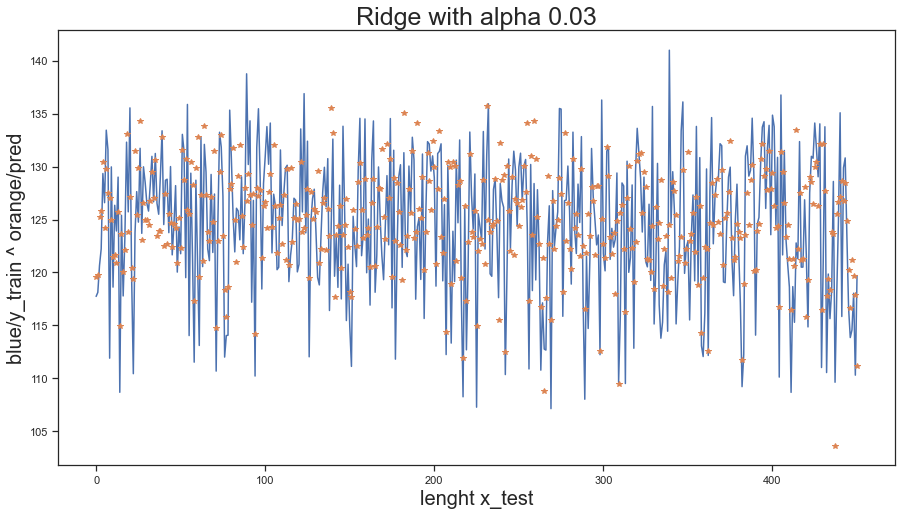

In [178]:
#graph with alpha with mean squared error min
#como estamos prediciendo test solo tomamos la longitud de x_test

_ridge = Ridge(alpha=alpha).fit(x_train, y_train)
_pred = _ridge.predict(x_test)

fig_rg , ax_rg = plt.subplots()
ax_rg.plot(range(x_test.shape[0]), y_test, '-', range(x_test.shape[0]), _pred,'*')
fig_rg.set_size_inches(15,8)
plt.title('Ridge with alpha {:.2f}'.format(alpha), size=25)
plt.xlabel('lenght x_test', size=20)
plt.ylabel('blue/y_train ^ orange/pred', size=20)
plt.show()
#END LASSO

In [191]:
#for lasso/ lasso es mejor para dataset's with under numbers features 

from sklearn.linear_model import Lasso

p_lasso = np.linspace(0.1,1,100)
data_plasso = []

for i in p_lasso:
    
    lasso = Lasso(alpha=i).fit(x_train,y_train)
    lasso_pred = lasso.predict(x_test)
    
    data_plasso.append(mean_squared_error(y_test, lasso_pred))
    
df_mselasso = pd.DataFrame({'MSE-Lasso':data_plasso, 'alpha':p_lasso})
print('Point where MSE is min')
print(df_mselasso[df_mselasso['MSE-Lasso']==df_mselasso['MSE-Lasso'].min()])
alphaL = p_lasso[0]
print(alphaL)


Point where MSE is min
   MSE-Lasso  alpha
0   26.78968    0.1
0.1


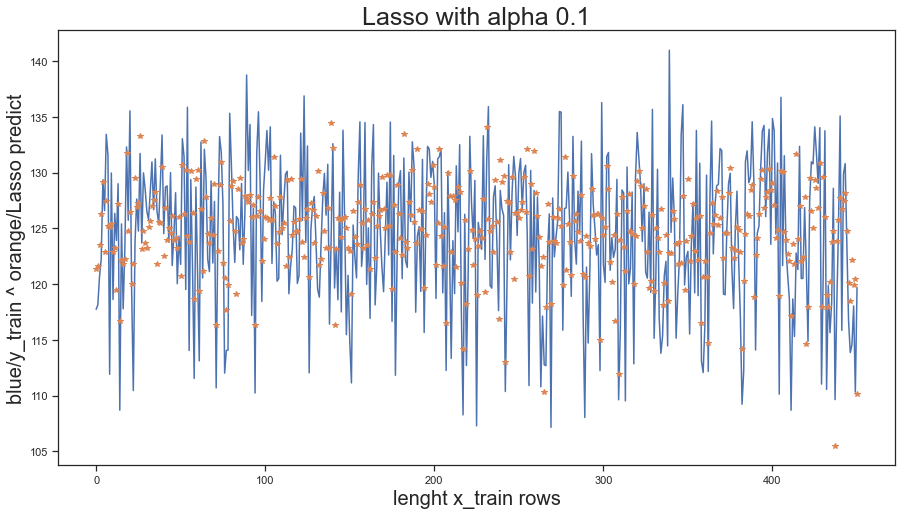

In [195]:
#CON ALPHA GRAFICAMOS LOS DATOS Y LA OREDICCION DE LASSO

_lasso = Lasso(alpha=alphaL).fit(x_train, y_train)
_Lpred = _lasso.predict(x_test)

fig_lss, ax_lss = plt.subplots()
ax_lss.plot(range(x_test.shape[0]),y_test,'-', range(x_test.shape[0]), _Lpred,'*')
fig_lss.set_size_inches(15,8)
plt.title('Lasso with alpha {}'.format(alpha), size=25)
plt.xlabel('lenght x_train rows', size=20)
plt.ylabel('blue/y_train ^ orange/Lasso predict', size=20)
plt.show()

In [207]:
#predict's

print('score reglin',linreg.score(x_test, y_test))
print('score ridge',_ridge.score(x_test,y_test))
print('score lasso',_lasso.score(x_test,y_test))

score reglin 0.4688640944217043
score ridge 0.471692127747284
score lasso 0.4258544674285696
